In [68]:
import timm
import torch
import matplotlib.pyplot as plt
from PIL import Image

from src.model.quadtree_classifier import QuadtreeClassifier
from src.data.visiomel_datamodule import VisiomelDatamodule

In [14]:
backbone = timm.create_model('resnet18', pretrained=True, num_classes=0)
model = QuadtreeClassifier(
    backbone_name='resnet18', 
    splitter_hidden_size=64, 
    patch_size=64,
    num_classes = 2, 
    optimizer_init = None,
    lr_scheduler_init = None,
    pl_lrs_cfg = None,
    pretrained = True,
    finetuning = None,
    log_norm_verbose = False,
)
model.load_state_dict(
    torch.load('/workspace/visiomel-2023/visiomel/5mmbyadg/checkpoints/last.ckpt')['state_dict'], 
    strict=True
)

<All keys matched successfully>

In [49]:
datamodule = VisiomelDatamodule(
    data_dir_train = '/workspace/data/images_page_7/',	
    k = 5,
    fold_index = 0,
    data_dir_test = None,
    img_size = 3072,
    shrink_preview_scale = None,
    batch_size = 1,
    split_seed = 0,
    num_workers = 0,
    pin_memory = False,
    prefetch_factor = None,
    persistent_workers = False,
    sampler = None,
    enable_caching = False,
)
datamodule.setup()

In [52]:
val_dataloader, _ = datamodule.val_dataloader()

In [66]:
tmp_0 = next(iter(val_dataloader))
tmp_1 = next(iter(val_dataloader))
tmp_2 = next(iter(val_dataloader))
assert torch.allclose(tmp_0[0], tmp_1[0])
assert torch.allclose(tmp_0[0], tmp_2[0])

In [90]:
dataloader_iter = iter(val_dataloader)
x, y = next(dataloader_iter)
x, y = next(dataloader_iter)
x_path, y_before_transform = val_dataloader.dataset.subset.dataset.samples[val_dataloader.dataset.subset.indices[1]]
x.shape

torch.Size([1, 3, 3072, 3072])

In [91]:
x

tensor([[[[ 1.8893,  1.8893,  1.8893,  ..., -2.1179, -2.1179, -2.1179],
          [ 1.8893,  1.8893,  1.8893,  ..., -2.1179, -2.1179, -2.1179],
          [ 1.8893,  1.8893,  1.8893,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [ 1.9064,  1.9064,  1.9064,  ..., -2.1179, -2.1179, -2.1179],
          [ 1.9064,  1.9064,  1.9064,  ..., -2.1179, -2.1179, -2.1179],
          [ 1.9064,  1.9064,  1.9064,  ..., -2.1179, -2.1179, -2.1179]],

         [[ 2.0259,  2.0259,  2.0259,  ..., -2.0357, -2.0357, -2.0357],
          [ 2.0259,  2.0259,  2.0259,  ..., -2.0357, -2.0357, -2.0357],
          [ 2.0259,  2.0259,  2.0259,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [ 2.0434,  2.0434,  2.0434,  ..., -2.0357, -2.0357, -2.0357],
          [ 2.0434,  2.0434,  2.0434,  ..., -2.0357, -2.0357, -2.0357],
          [ 2.0434,  2.0434,  2.0434,  ..., -2.0357, -2.0357, -2.0357]],

         [[ 2.2566,  2.2566,  2.2566,  ..., -1.8044, -1.8044, -1.8044],
          [ 2.2566,  2.2566,  

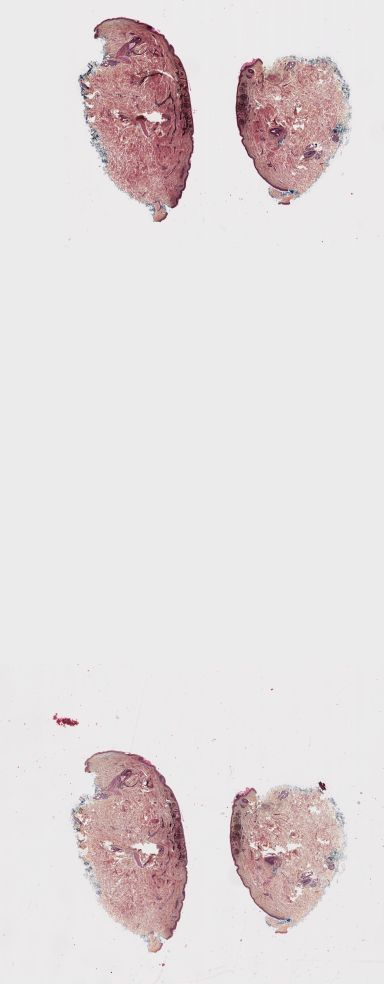

In [92]:
img = Image.open(x_path)
img

In [84]:
preds, split_decision_logits = [], []
for i in range(x.shape[0]):
    pred, logits = model.embedding(
        x[i, ...].unsqueeze(0), 
        output_split_logits=True, 
        random_split=False
    )
    preds.append(pred)
    split_decision_logits.append(logits)

In [85]:
split_decision_logits[0].shape

torch.Size([1, 1, 48, 48, 2])

In [86]:
split_decision_logits[0][0, 0, ...].detach().numpy()

array([[[ 1.683576, -1.744751],
        [ 1.683576, -1.744751],
        [ 1.683576, -1.744751],
        ...,
        [ 1.683576, -1.744751],
        [ 1.683576, -1.744751],
        [ 1.683576, -1.744751]],

       [[ 1.683576, -1.744751],
        [ 1.683576, -1.744751],
        [ 1.683576, -1.744751],
        ...,
        [ 1.683576, -1.744751],
        [ 1.683576, -1.744751],
        [ 1.683576, -1.744751]],

       [[ 1.683576, -1.744751],
        [ 1.683576, -1.744751],
        [ 1.683576, -1.744751],
        ...,
        [ 1.683576, -1.744751],
        [ 1.683576, -1.744751],
        [ 1.683576, -1.744751]],

       ...,

       [[ 1.683576, -1.744751],
        [ 1.683576, -1.744751],
        [ 1.683576, -1.744751],
        ...,
        [ 1.683576, -1.744751],
        [ 1.683576, -1.744751],
        [ 1.683576, -1.744751]],

       [[ 1.683576, -1.744751],
        [ 1.683576, -1.744751],
        [ 1.683576, -1.744751],
        ...,
        [ 1.683576, -1.744751],
        [ 1.683576

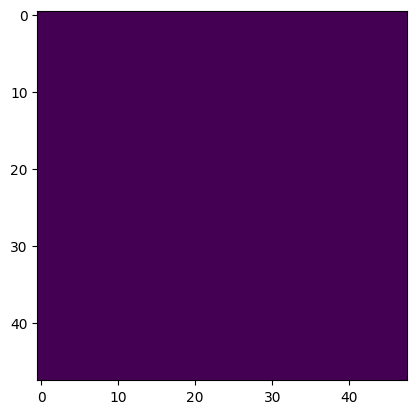

In [93]:
plt.imshow(split_decision_logits[0][0, 0, ..., 0].detach().numpy())

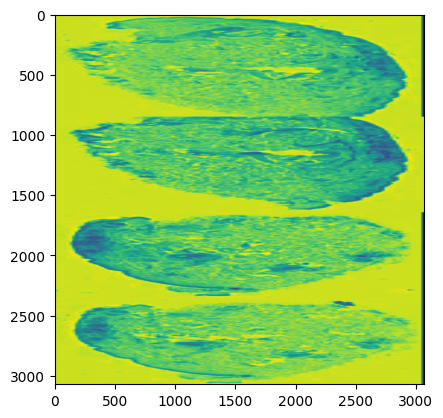

In [89]:
plt.imshow(x[0, 0, ...].detach().numpy())